# Figure 6: Denmark Strait freshwater transport basin timeseries

This notebook will reproduce Figure 6 from  E. Boland et al. 2025 (doi to come). This requires input datafiles (expects to find them in ../data_out) to run - please see the README for details.

Please attribute any plots or code from this notebook using the DOI from Zenodo: TO COME

E Boland Mar 2025 [emmomp@bas.ac.uk](email:emmomp@bas.ac.uk)

In [1]:
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import cmasher as cmr

from inputs import *

In [2]:
masks_plot=['global','egland','natl','arct','gin']
mths_a=['Mar','Jun','Sep','Dec']
mths_b=mth

In [18]:
def preproc(ds):
    ds=ds.interp(lag_years=np.arange(-5,0,0.025))
    return ds

In [21]:
ds_tseries_all=xr.open_dataset('../data_out/horflux_fw_denm_adjsens_basin_tseries.nc')

dJ_all=[]
for eyear in eyears:
    print(eyear)
    foo=xr.open_mfdataset(f'{CONTR_DIR}/{eyear}/horflux_fw_denm_contr_tseries_*.nc',combine='nested',concat_dim='exp',preprocess=preproc)
    dJ_all.append(foo.assign_coords({'eyear':eyear}).swap_dims({'exp':'month'}).drop_vars(['exp']))
dJ_all=xr.concat(dJ_all,'eyear',coords='minimal',compat='override')

2006
2014
2000


In [5]:
def preproc(ds):
    eyear=ds.encoding['source'].split('_')[-1][:4]
    ds=ds.interp(lag_years=np.arange(-5,0,0.025))
    return ds.assign_coords({'eyear':eyear})
cum_ev=xr.open_mfdataset(f"{EV_DIR}/????/{FCNAME}_cumev_bylag_bybasin_bymonth_*.nc",combine='nested',concat_dim='eyear',preprocess=preproc)

/data/hpcdata/users/emmomp/conda-envs/canari/lib/python3.9/site-packages/dask/array/numpy_compat.py:56: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/data/hpcdata/users/emmomp/conda-envs/canari/lib/python3.9/site-packages/dask/array/numpy_compat.py:56: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/data/hpcdata/users/emmomp/conda-envs/canari/lib/python3.9/site-packages/dask/array/numpy_compat.py:56: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/data/hpcdata/users/emmomp/conda-envs/canari/lib/python3.9/site-packages/dask/array/numpy_compat.py:56: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/data/hpcdata/users/emmomp/conda-envs/canari/lib/python3.9/site-packages/dask/array/numpy_compat.py:56: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/data/hpcdata/users/emmomp/conda-envs/canari/lib/python3.9/site-packages/da

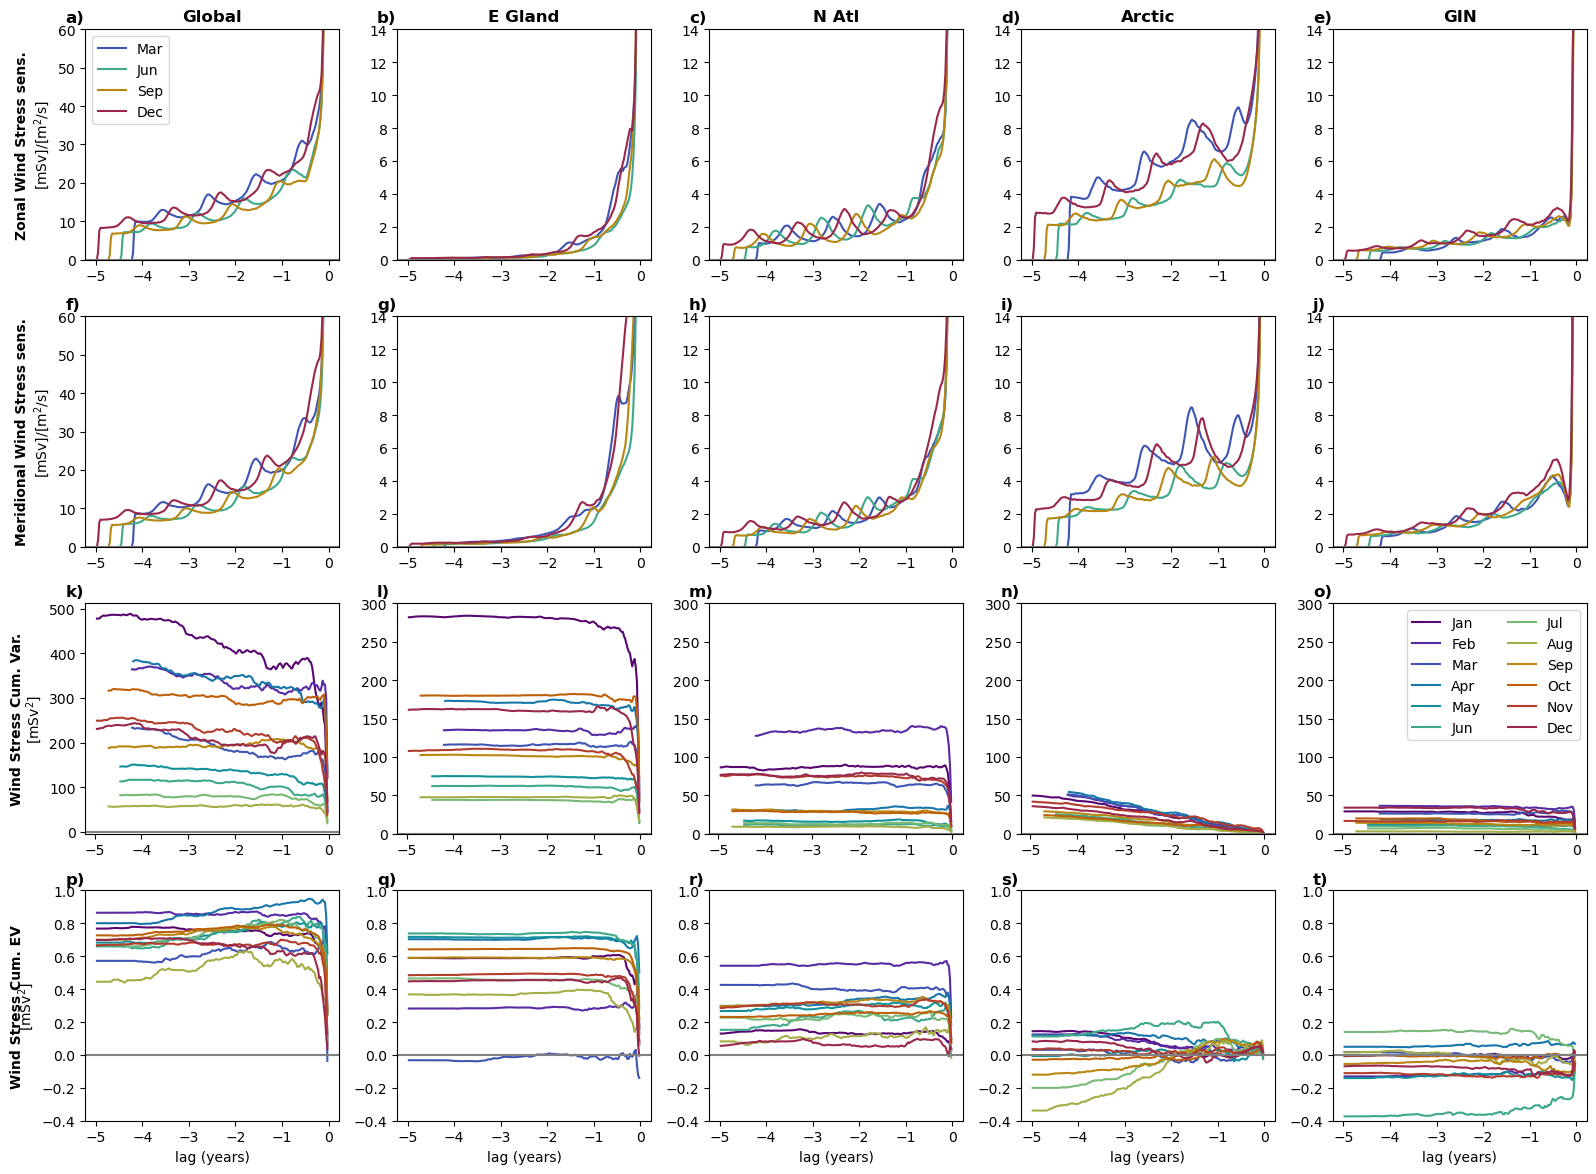

In [22]:
plt.figure(figsize=[16,12])
ip=1

#colormap=plt.get_cmap('coolwarm')(np.linspace(0,1,4))
#colormap = cmr.take_cmap_colors('cmr.infinity', 4,cmap_range=(0,0.85))
colormap = cmr.take_cmap_colors('cmr.infinity', 12,cmap_range=(0,0.85))

for iv,var in enumerate(['adxx_tauu','adxx_tauv']):
    for ib,basin in enumerate(masks_plot):
        ax=plt.subplot(4,len(masks_plot),ip)
        pp=[]
        for im,mth in enumerate(mths_a):
            pp.append(((1e-3*ds_tseries_all[var]).sel(stat='abssum',mask=basin,month=mth).mean('eyear').plot(ax=ax,x='lag_years',add_legend=False,color=colormap[mthi[mth]-1]))[0])
        if ib ==0:
            plt.ylim([0,60])
            plt.ylabel('[mSv]/[{}]'.format(adj_units[var]))
            ax.text(-0.25,0.5,f'{adj_labels[var]} sens.',fontweight='bold',transform=ax.transAxes,ha='center',va='center',rotation=90)
            if iv==0:
                plt.legend(pp,mths_a)               
        else:
            plt.ylim([0,14])
            plt.ylabel('')
        if iv==0:
            plt.title(masks_labels[basin],fontweight='bold')
        else:
            plt.title('')
        plt.axhline(0,color='grey')
        plt.xlabel('')
        plt.text(-0.08,1.03,f'{chr(96+ip)})',transform=plt.gca().transAxes,fontsize=12,fontweight='bold')
        ip+=1

#colormap=plt.get_cmap('plasma')(np.linspace(0,1,12))
#colormap = cmr.take_cmap_colors('cmr.seasons', 12)
#colormap = cmr.take_cmap_colors('cmr.infinity', 12,cmap_range=(0,0.85))
                              
for ib,basin in enumerate(masks_plot):
    ax=plt.subplot(4,len(masks_plot),ip)
    pp=[]
    for im,mth in enumerate(mths_b):
        pp.append(((1e-3*dJ_all['wind_OCE']).sel(stat='sum',mask=basin,month=mthi[mth],year=slice(1996,None)).var('year').mean('eyear').dropna('lag_years')[1:].plot(ax=ax,x='lag_years',add_legend=False,color=colormap[im]))[0])
    if ib ==0:
        plt.ylabel('[mSv$^2$]')
        ax.text(-0.27,0.5,f'Wind Stress Cum. Var.',fontweight='bold',transform=ax.transAxes,ha='center',va='center',rotation=90)             
    else:
        plt.ylim([0,300])
        plt.ylabel('')
    if ib==len(masks_plot)-1:
        plt.legend(pp,mths_b,ncol=2)  
    plt.title('')
    plt.axhline(0,color='grey')
    plt.xlabel('')
    plt.text(-0.08,1.03,f'{chr(96+ip)})',transform=plt.gca().transAxes,fontsize=12,fontweight='bold')
    ip+=1

for ib,basin in enumerate(masks_plot):
    ax=plt.subplot(4,len(masks_plot),ip)
    pp=[]
    for im,mth in enumerate(mths_b):
        pp.append((cum_ev['wind_OCE'].sel(mask=basin,month=mthi[mth]).mean('eyear').plot(ax=ax,x='lag_years',add_legend=False,color=colormap[im]))[0])
    if ib ==0:
        plt.ylabel('[mSv$^2$]')
        ax.text(-0.27,0.5,f'Wind Stress Cum. EV',fontweight='bold',transform=ax.transAxes,ha='center',va='center',rotation=90)            
    else:
        plt.ylabel('')
    plt.ylim([-0.4,1.0])
    plt.title('')
    plt.axhline(0,color='grey')
    plt.xlabel('lag (years)')
    plt.text(-0.08,1.03,f'{chr(96+ip)})',transform=plt.gca().transAxes,fontsize=12,fontweight='bold')
    ip+=1
        
plt.suptitle('',fontweight='bold')
plt.tight_layout()

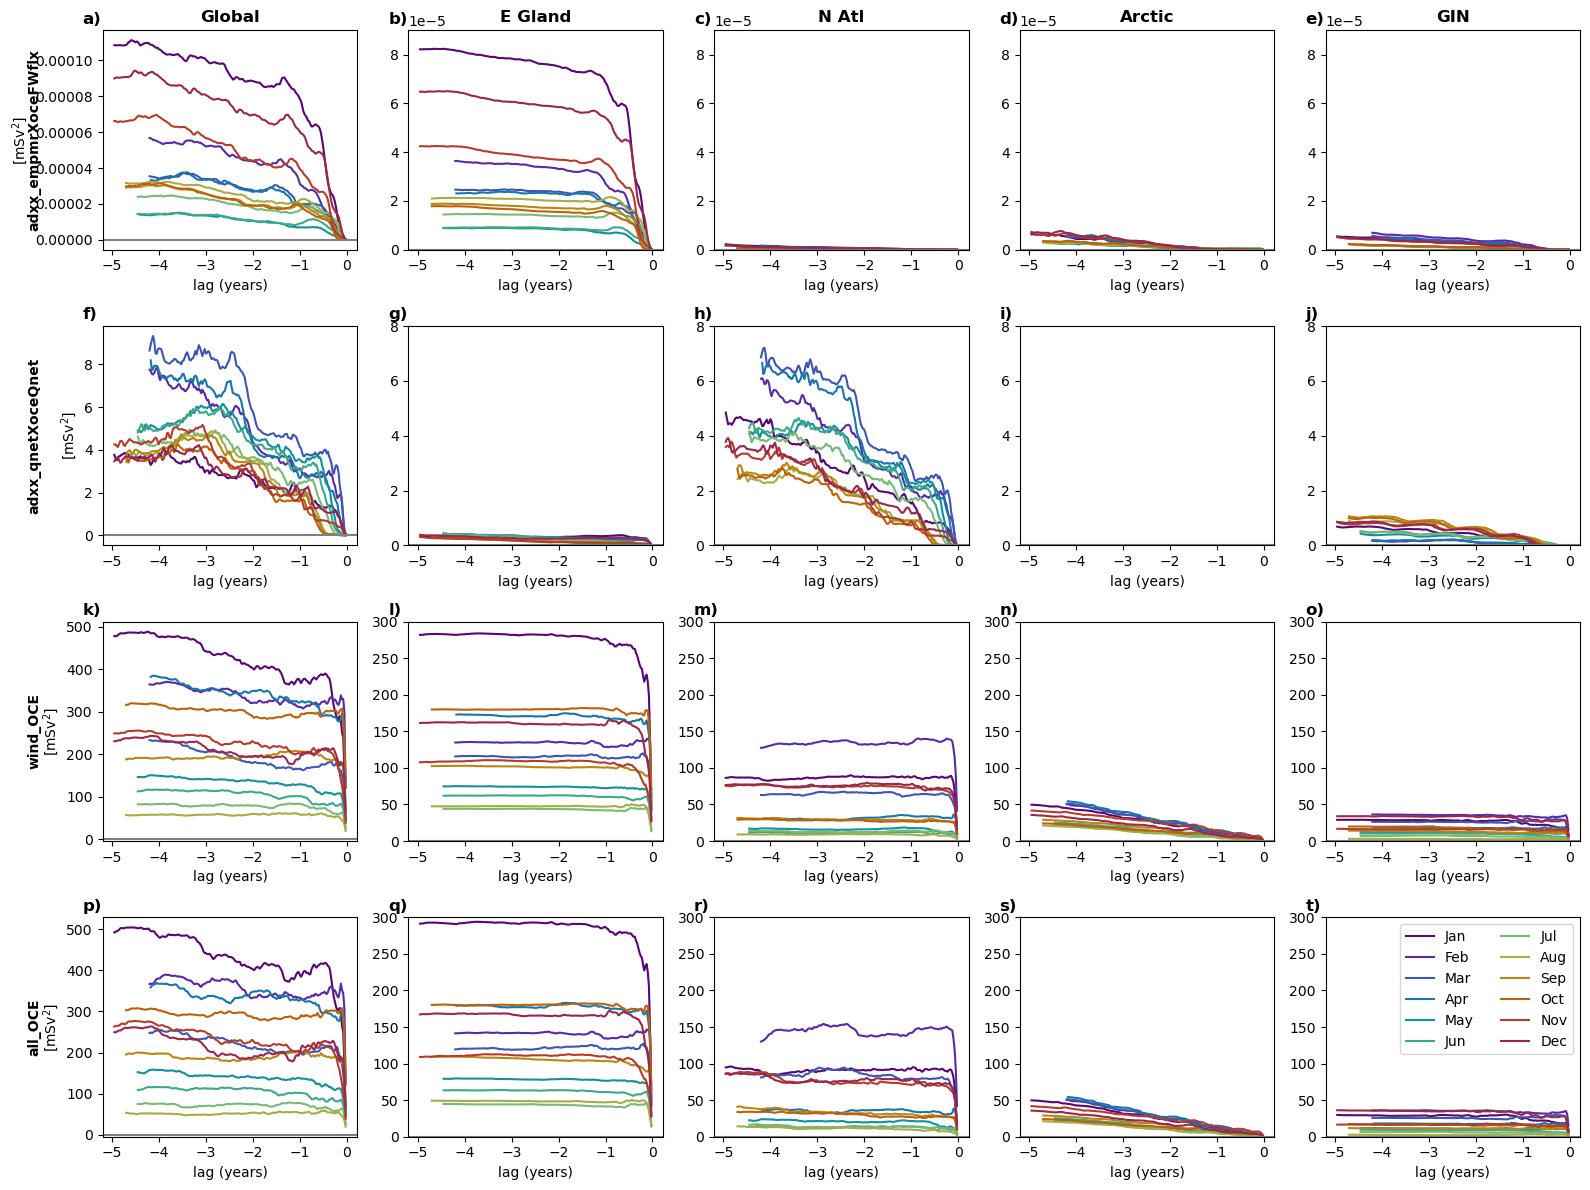

In [32]:
colormap = cmr.take_cmap_colors('cmr.infinity', 12,cmap_range=(0,0.85))
ylims=[9e-5,8,300,300]

plt.figure(figsize=[16,12])
ip=1
for iv,var in enumerate(['adxx_empmrXoceFWflx','adxx_qnetXoceQnet','wind_OCE','all_OCE']):
    for ib,basin in enumerate(masks_plot):
        ax=plt.subplot(4,len(masks_plot),ip)
        pp=[]
        for im,mth in enumerate(mths_b):
            pp.append(((1e-3*dJ_all[var]).sel(stat='sum',mask=basin,month=mthi[mth],year=slice(1996,None)).var('year').mean('eyear').dropna('lag_years')[1:].plot(ax=ax,x='lag_years',add_legend=False,color=colormap[im]))[0])
        if ib ==0:
            plt.ylabel('[mSv$^2$]')
            ax.text(-0.27,0.5,var,fontweight='bold',transform=ax.transAxes,ha='center',va='center',rotation=90)  
    #        plt.ylim([0,500])
        else:
            plt.ylabel('')
            plt.ylim([0,ylims[iv]])
        if iv==0:
            plt.title(masks_labels[basin],fontweight='bold')
        else:
            plt.title('')
   #     plt.ylim([-0.4,1.0])
        plt.axhline(0,color='grey')
        plt.xlabel('lag (years)')
        plt.text(-0.08,1.03,f'{chr(96+ip)})',transform=plt.gca().transAxes,fontsize=12,fontweight='bold')
        ip+=1

plt.legend(pp,mths_b,ncol=2)  
plt.tight_layout()

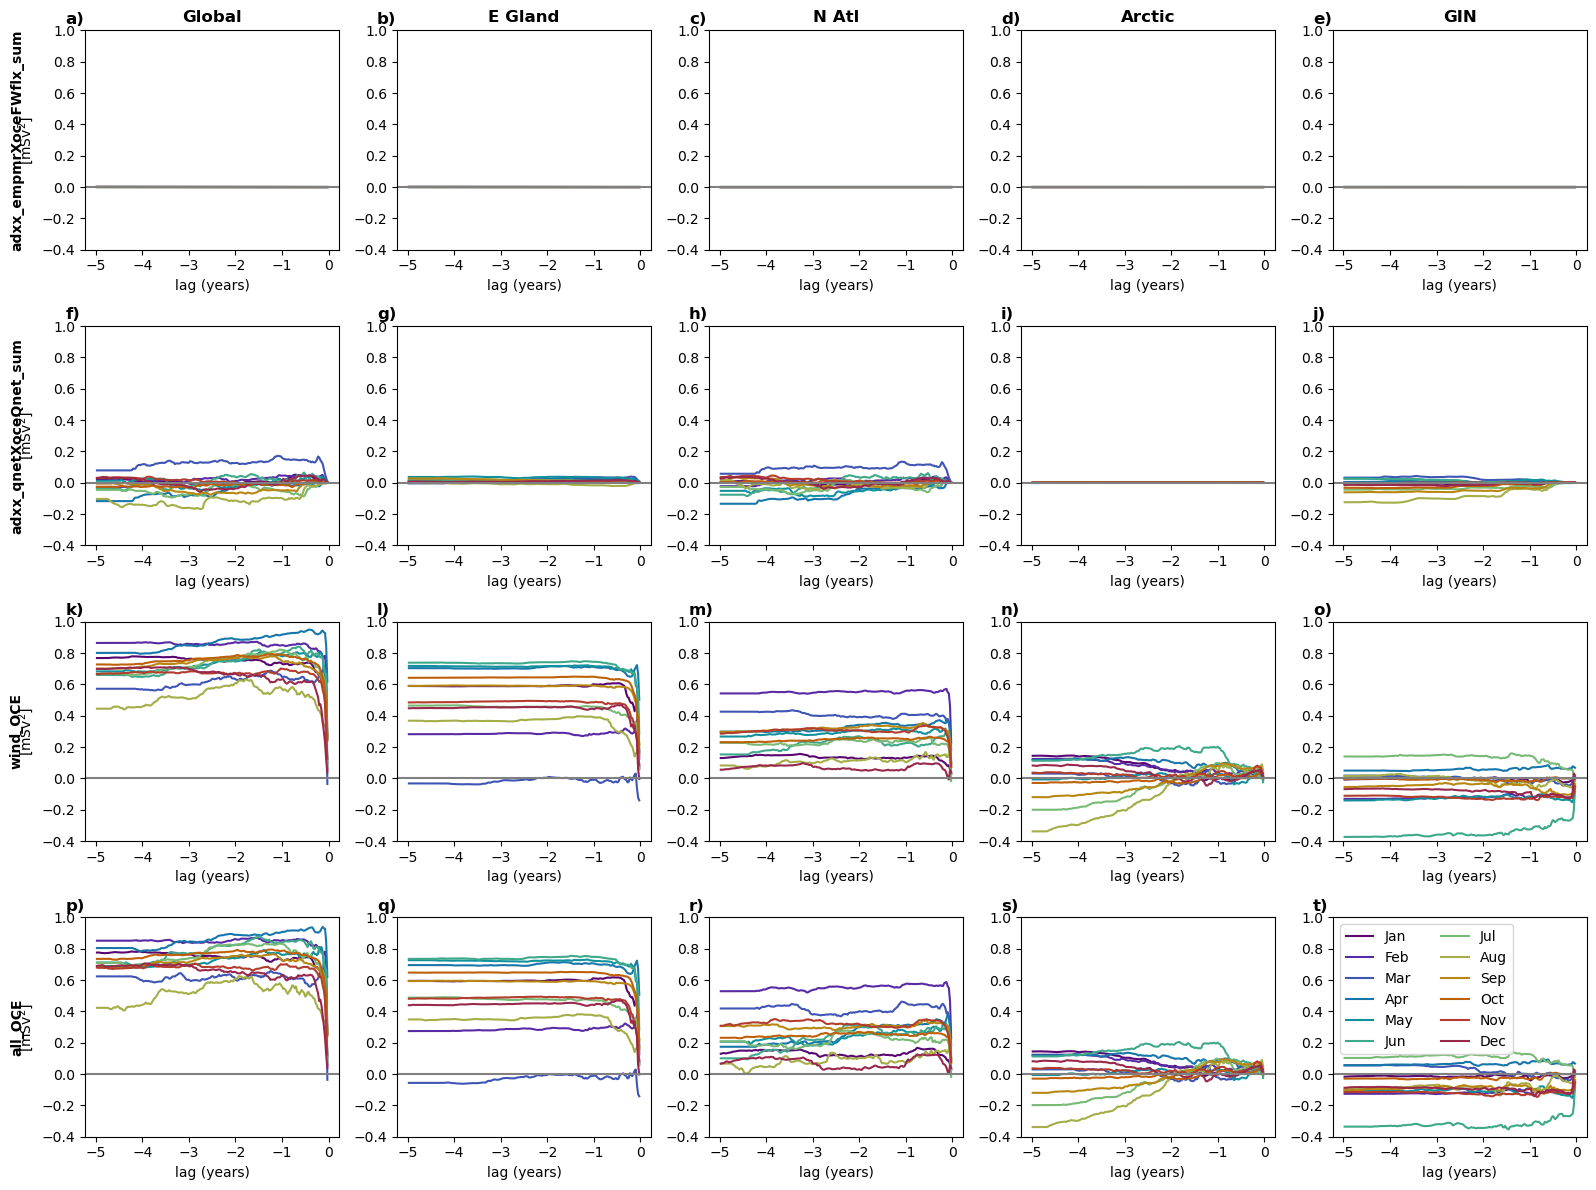

In [14]:
colormap = cmr.take_cmap_colors('cmr.infinity', 12,cmap_range=(0,0.85))

plt.figure(figsize=[16,12])
ip=1
for iv,var in enumerate(['adxx_empmrXoceFWflx_sum','adxx_qnetXoceQnet_sum','wind_OCE','all_OCE']):
    for ib,basin in enumerate(masks_plot):
        ax=plt.subplot(4,len(masks_plot),ip)
        pp=[]
        for im,mth in enumerate(mths_b):
            pp.append((cum_ev[var].sel(mask=basin,month=mthi[mth]).mean('eyear').plot(ax=ax,x='lag_years',add_legend=False,color=colormap[im]))[0])
        if ib ==0:
            plt.ylabel('[mSv$^2$]')
            ax.text(-0.27,0.5,var,fontweight='bold',transform=ax.transAxes,ha='center',va='center',rotation=90)            
        else:
            plt.ylabel('')
        if iv==0:
            plt.title(masks_labels[basin],fontweight='bold')
        else:
            plt.title('')
        plt.ylim([-0.4,1.0])
        plt.axhline(0,color='grey')
        plt.xlabel('lag (years)')
        plt.text(-0.08,1.03,f'{chr(96+ip)})',transform=plt.gca().transAxes,fontsize=12,fontweight='bold')
        ip+=1

plt.legend(pp,mths_b,ncol=2)  
plt.tight_layout()